#    Ezra Jennings: The Ostracized Hero; Exploring _The Moonstone_'s                                              Contradictory Protagonist

## Lexie Ponce

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

In [1]:
# LIbraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from nltk import word_tokenize as tokenize, sent_tokenize
from nltk.text import Text
from  nltk.text import ConcordanceIndex
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

C:\Users\silve\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
C:\Users\silve\Anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [2]:
filename = 'Lexie-Final.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('Lexie-Final.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1190


   In Wilkie Collins' _The Moonstone_, Collins is able to explore the themes of Victorian culture and exoticism through the guise of a mystery novel. Set in the 19th century in England, we read through the written testaments of the characters which are surrounded by the disappearance of the exotic moonstone. Throughout the novel exotic characters which do not fit into the Victorian standard seem to be judged and ostracized. Franklin Blake, one of the protagonists of the story, is depicted as untrustworthy with a multi-faceted personality due to being educated in multiple parts of Europe. The Brahmin guardians of the moonstone are instantaneously accused of the theft of the diamond and are put into jail despite the case remaining open. Despite these characters' tension with the other traditional British characters, Ezra Jennings, an ethnically ambiguous figure, develops into the hero of the story by solving the case. What sets Jennings apart from the rest of the foreign personalities in the story? I argue that Jennings was depicted as a sympathetic character, despite his exoticism and drug addiction, due to the influence of Collins' own struggles of addiction in his personal life. Through usage of sentiment analysis and exploring keywords in narrative time I aim to derive and analyze the opinion Collins held of Ezra Jennings. 
   
I started my sentiment analysis by opening a text file I created which consists solely of the narrative of Jennings. I wanted to analyze Collins' writing that is purely in the perspective of Jennings because it might be a stronger indicator of Collins' true opinion of Jennings. After sentence tokenizing the sentences in my text I got the polarity scores of each sentence. Polarity scores can tell us whether the author's writing consists of negative, neutral, or positive content which can then be interpreted as how the author feels about that particular content. I also did a sentiment analysis of concordances with the words "Indians" and "Indian" throughout the novel to see if there is a computational result which can show the difference in opinion between how Collins views the Indian characters in the novel versus how Collins views Jennings. I hypothesized that there may be a tension between the positive and negative polarity scores with Jennings, and my results confirmed my hypothesis; the results don't lean toward a particular polarity. Throughout the storyline which involves Jennings, he is painted as a conflicted and diverging character. Frankling Blake's impression of Jennings fully encapsulates Jennings as a contradiction when he states, "His gipsy-complexion, his fleshless cheeks, his gaunt facial bones, his dreamy eyes, his extraordinary parti-coloured hair, the puzzling contradiction between his face and figure which made him look old and young both together–were all more or less calculated to produce an unfavourable impression of him on a stranger’s mind. And yet–feeling this as I certainly did–it is not to be denied that Ezra Jennings made some inscrutable appeal to my sympathies, which I found it impossible to resist" (Collins). Collins' diction to describe Jennings consists of adjectives that are on opposite sides of the spectrum; not only does he describe him as gauntly and foreign, but he also uses verbage like dreamy and extraordinary. Through the sentiment analysis of Jennings' narration, one can computationally see the dichotomous opinion Collins' holds of Jennings while the literary analysis supports these results. 

I hoped that my sentiment analysis of the concordances of "Indians" and "Indian" would be able to computationally show Collins' interpretation of the three Indian Brahmins. Throughout the story, the three Brahmins are portrayed as sketchy outsiders. Our suspicions of the three Brahmins as the moonstone theives is created in the first narrator's, Mr. Betteredge, narration. They continue to raise suspicion and judgement as they continue to track the location of the moonstone through whatever means necessary. I hypothesized that my sentiment analysis would have resulted in a majority of a negative polarity score due to the diction Collins chooses to describe the Brahmins. However, there seems to be a similar balance between negative and positive polarity scores like Jennings'. There may be a contribution to a slightly higher positive score in regard to the "Indian" concordance since "Indian" also precedes words like "jewel"; since "Indian jewel" is in regard to the moonstone, I might be getting a higher positive polarity score due to the idolization the moonstone receives. Despite this discrepancy the results can render an interpretation that the Indian Brahmins aren't as villainized as I had construed throughout my reading of _The Moonstone_. In the eyes of the British characters the Brahmins are seen as foreign outsiders, even criminals; nonetheless, Collins is aware of their religious duty to retrieve the moonstone to its rightful place in India, which may explain the balance between polarity scores. 

I continued to investigate what sets Jennings apart from the rest of the foreign characters and finally answer the question: why was Jennings the ultimate hero of the story? I created a lexical dispersion plot in narrative time of the whole story of _The Moonstone_ to try and delve deeper. I chose the words "Ezra", "opium", "Indian", "ugly", "dreamy", "foreign", and "beautiful" to explore the themes of exoticism. I was surprised to find that "Indian" seems to have many instances of overlapping with "foreign", while "Ezra" only has around three instances of overlap. Regardless to Jennings' ethnic ambiguity, Collins does not seem to use explicit verbage to categorize Jennings into the same type of outcasts as the Brahmins. What sets Jennings apart from the other foreign characters is his heavy dependency on opium. Through my lexical dispersion plot, one can see the noticeable relation between Jennings and opium through the heavy overlap of "Ezra" and "opium". Opium was particularly popular substance for healing; Jennings' usage of opium initially had medicinal purposes and eventually turned into an addiction. 

It has been revealed that in Collins' personal life he used opium for the same medicinal purposes and Ezra Jennings was a character that was "partly autobiograpghical" (Clarke). My sentiment analysis of Jennings' narrative is a prime example of Collins' struggle to completely disregard Jennings as an outcast like the rest of his foreign characters. Since Jennings was a figure influenced by the personal life of Collins, it makes sense as to why he would paint Jennings as such a sympathetic yet heroic character. Collins' resistance to categorize Jennings into the same category of foreigners seen as degenerates as shown by the lexical dispersion plot expose Collins' own sympathy for Jennings and himself. 

In [3]:
# Defining text file
ezra = open('5_ezra.txt').read()

In [4]:
#Sentence tokenizing Ezra's narrative
ezraSent = sent_tokenize(ezra)
#lowercasing tokens
ezraTokensLower = [token.lower() for token in ezraSent]

In [5]:
# To visually see what I'm doing, I'm sentence tokenizing Ezra's narration and doing a sentiment analysis for each sentence.
sid = SentimentIntensityAnalyzer()
for sentence in ezraTokensLower:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
      data = print('{0}: {1}, '.format(k, ss[k]), end='')
    print(data)



## fourth narrative

extracted from the journal of ezra jennings

1849.–june 15….
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
with some interruption from patients, and some
interruption from pain, i finished my letter to miss verinder in time
for to-day’s post.
compound: -0.836, neg: 0.368, neu: 0.632, pos: 0.0, None
i failed to make it as short a letter as i could have
wished.
compound: -0.5106, neg: 0.248, neu: 0.752, pos: 0.0, None
but i think i have made it plain.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
it leaves her entirely
mistress of her own decision.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
if she consents to assist the experiment,
she consents of her own free will, and not as a favour to mr. franklin
blake or to me.
compound: 0.5986, neg: 0.078, neu: 0.684, pos: 0.238, None
june 16th.–rose late, after a dreadful night; the vengeance of
yesterday’s opium, pursuing me through a series of frightful dreams.
compound: -0.5423, neg: 0.259, neu: 0.628, pos

i’m
determined not to be behind ’em, or before ’em, by so much as a hair’s
breadth.
compound: 0.34, neg: 0.0, neu: 0.862, pos: 0.138, None
i’m a blind agent–that’s what i am.
compound: -0.4019, neg: 0.403, neu: 0.597, pos: 0.0, None
a blind agent!” repeated
betteredge, with infinite relish of his own description of himself.
compound: -0.4574, neg: 0.2, neu: 0.8, pos: 0.0, None
“i am very sorry,” i began, “that you and i don’t agree—-”

“don’t bring me, into it!” interposed betteredge.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
“this is not a matter
of agreement, it’s a matter of obedience.
compound: -0.4168, neg: 0.406, neu: 0.594, pos: 0.0, None
issue your directions,
sir–issue your directions!”

mr. blake made me a sign to take him at his word.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
i “issued my
directions” as plainly and as gravely as i could.
compound: -0.3612, neg: 0.217, neu: 0.783, pos: 0.0, None
“i wish certain parts of the house to be reopened,” i said, “and 

compound: 0.0828, neg: 0.071, neu: 0.844, pos: 0.084, None
to my great surprise, betteredge laid his hand confidentially on my arm,
and put this extraordinary question to me:

“mr.
compound: 0.8555, neg: 0.0, neu: 0.644, pos: 0.356, None
jennings, do you happen to be acquainted with robinson crusoe?”

i answered that i had read robinson crusoe when i was a child.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
“not since then?” inquired betteredge.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
“not since then.”

he fell back a few steps, and looked at me with an expression of
compassionate curiosity, tempered by superstitious awe.
compound: 0.4939, neg: 0.0, neu: 0.868, pos: 0.132, None
“he has not read robinson crusoe since he was a child,” said betteredge,
speaking to himself–not to me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
“let’s try how robinson crusoe strikes
him now!”

he unlocked a cupboard in a corner, and produced a dirty and dog’s-eared
book, which exhaled a

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
reached the house an hour since.
compound: 0.1027, neg: 0.0, neu: 0.781, pos: 0.219, None
a little before nine o’clock, i prevailed on mr. blake to accompany me
to his bedroom; stating, as a reason, that i wished him to look round
it, for the last time, in order to make quite sure that nothing had been
forgotten in the refurnishing of the room.
compound: 0.5038, neg: 0.0, neu: 0.91, pos: 0.09, None
i had previously arranged
with betteredge, that the bedchamber prepared for mr. bruff should be
the next room to mr. blake’s, and that i should be informed of the
lawyer’s arrival by a knock at the door.
compound: 0.2263, neg: 0.0, neu: 0.946, pos: 0.054, None
five minutes after the clock in
the hall had struck nine, i heard the knock; and, going out immediately,
met mr. bruff in the corridor.
compound: -0.25, neg: 0.08, neu: 0.92, pos: 0.0, None
my personal appearance (as usual) told against me.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, N

my watch informs me that it is close on eleven o’clock.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
i must shut up
these leaves once more.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
-----

two o’clock a.m.–the experiment has been tried.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
with what result, i am
now to describe.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
at eleven o’clock, i rang the bell for betteredge, and told mr. blake
that he might at last prepare himself for bed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
i looked out of the window at the night.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
it was mild and rainy,
resembling, in this respect, the night of the birthday–the twenty-first
of june, last year.
compound: 0.5147, neg: 0.059, neu: 0.775, pos: 0.165, None
without professing to believe in omens, it was at
least encouraging to find no direct nervous influences–no stormy or
electric perturbations–in the atmosphere.
compound: 0.0258, 

compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
i drew
back, with mr. bruff and betteredge, into the farthest corner by the
bed.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
i signed to them to be silent, as if their lives had depended on
it.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
we waited–seeing and hearing nothing.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
we waited, hidden from him by the
curtains.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
the light which he was holding on the other side of us moved suddenly.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
the next moment he passed us, swift and noiseless, with the candle in
his hand.
compound: 0.6124, neg: 0.0, neu: 0.722, pos: 0.278, None
he opened the bedroom door, and went out.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
we followed him along the corridor.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
we followed him down the stairs.
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None

compound: 0.5719, neg: 0.0, neu: 0.654, pos: 0.346, None


In [6]:
#Creating arrays for each polarity score
compound = []
neg = []
neu = []
pos = []

sid = SentimentIntensityAnalyzer()
for sentence in ezraTokensLower:
    ss = sid.polarity_scores(sentence)
    compound.append(ss['compound'])
    neg.append(ss['neg'])
    neu.append(ss['neu'])
    pos.append(ss['pos'])

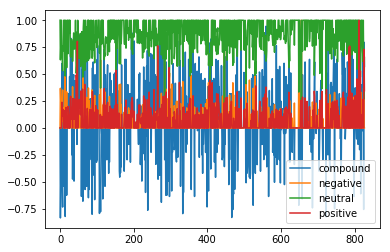

In [7]:
# Making a dataframe and plotting it
df = pd.DataFrame([compound, neg, neu, pos], index=['compound', 'negative', 'neutral', 'positive'])
df = df.T
df.plot(kind='line')

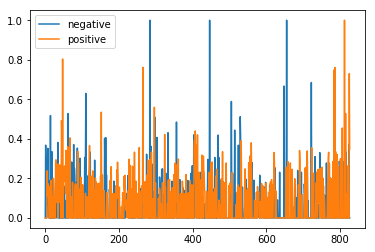

In [8]:
# Only plotting negative and positive scores through Ezra's narration
#plt.plot(compound)
plt.plot(neg)
#plt.plot(neu)
plt.plot(pos)

plt.legend(['negative', 'positive'], loc='upper left')

plt.show()

In [9]:
#Opening The Moonstone and tokenizing it
moonstone = open('moonstone.md', encoding="UTF-8").read()
moonstoneTokens = tokenize(moonstone)
moonstoneText = Text(moonstoneTokens)

In [10]:
def concordance(ci, word, width=75, lines=150):
    """
    Rewrite of nltk.text.ConcordanceIndex.print_concordance that returns results
    instead of printing them. 
    
    Code cited in Works Cited

    See:
    http://www.nltk.org/api/nltk.html#nltk.text.ConcordanceIndex.print_concordance
    """
    half_width = (width - len(word) - 2) // 2
    context = width // 4 # approx number of words of context

    results = []
    offsets = ci.offsets(word)
    if offsets:
        lines = min(lines, len(offsets))
        for i in offsets:
            if lines <= 0:
                break
            left = (' ' * half_width +
                    ' '.join(ci._tokens[i-context:i]))
            right = ' '.join(ci._tokens[i+1:i+context])
            left = left[-half_width:]
            right = right[:half_width]
            results.append('%s %s %s' % (left, ci._tokens[i], right))
            lines -= 1

    return results

In [11]:
ci = ConcordanceIndex(moonstoneText)
results = concordance(ci, 'Indians') + concordance(ci, 'Indian')
results

[' door , and saw the bodies of two Indians ( by their dress , as I guessed ,',
 ', I found three mahogany-coloured Indians , in white linen frocks and trous',
 's , looking up at the house . The Indians , as I saw on looking closer , ha',
 'hter . The two girls had seen the Indians pass out , after I had warned the',
 ' next words stirred me up . ) The Indians looked up the road and down the r',
 'uired . “ Tell me about the three Indians you have had at the house to-day ',
 ' ? ” “ A plot organised among the Indians who originally owned the jewel , ',
 ' me ? I find that three strolling Indians have been at the house , and that',
 'er we really have evidence of the Indians being on the track of the Moonsto',
 'appened . He had not met with the Indians , either going or returning . He ',
 'ed that I had disturbed the three Indians , lurking about the house , and b',
 's opinion was , not only that the Indians had been lurking about after the ',
 ' it , ” says Mr. Franklin , “ the Indi

In [12]:
#Just to visually show that I'm doing a sentiment analysis on each concordance
sid = SentimentIntensityAnalyzer()
for a in results:
    print(a)
    ss = sid.polarity_scores(a)
    for k in sorted(ss):
      data = print('{0}: {1}, '.format(k, ss[k]), end='')
    print(data)

 door , and saw the bodies of two Indians ( by their dress , as I guessed ,
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
, I found three mahogany-coloured Indians , in white linen frocks and trous
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
s , looking up at the house . The Indians , as I saw on looking closer , ha
compound: 0.34, neg: 0.0, neu: 0.833, pos: 0.167, None
hter . The two girls had seen the Indians pass out , after I had warned the
compound: -0.2732, neg: 0.139, neu: 0.861, pos: 0.0, None
 next words stirred me up . ) The Indians looked up the road and down the r
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
uired . “ Tell me about the three Indians you have had at the house to-day 
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, None
 ? ” “ A plot organised among the Indians who originally owned the jewel , 
compound: 0.3612, neg: 0.0, neu: 0.783, pos: 0.217, None
 me ? I find that three strolling Indians have been at the house , and that
compound: 0.0, neg: 0.

In [13]:
#Making more arrays to store the polarity scores 
compoundtwo = []
negtwo = []
neutwo = []
postwo = []

sid = SentimentIntensityAnalyzer()
for line in results:
    ss = sid.polarity_scores(line)
    for k in sorted(ss):
        compoundtwo.append(ss['compound'])
        negtwo.append(ss['neg'])
        neutwo.append(ss['neu'])
        postwo.append(ss['pos'])

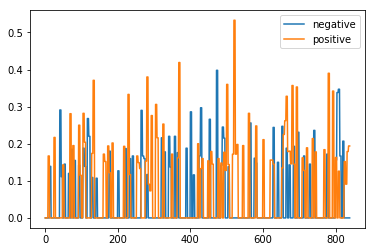

In [14]:
#Dataframe for Indians and Indian
dfTwo = pd.DataFrame([negtwo, postwo], index=['negative', 'positive'])
dfTwo = dfTwo.T
dfTwo.plot(kind='line')

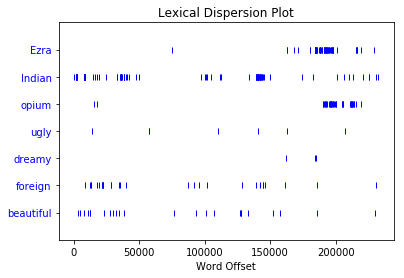

In [15]:
# Lexical dispersion plot in narrative time
moonstoneText.dispersion_plot(['Ezra', 'Indian', 'opium', 'ugly', 'dreamy', 'foreign', 'beautiful'])

## Works Cited

Clarke, John. “How Opium Was Really Used (And Abused); The Moonstone, Wilkie Collins and Wikipedia.” Synchronium, 21 May 2009, http://www.synchronium.net/2009/05/21/how-opium-was-really-used-and-abused/. Accessed 6 Aug. 2018.

Collins, Wilkie. _The Moonstone_. London: David Campbell: Distributed by Random House, 1992. Print.

Trienes, Jan. “How to Save NLTK Concordance Results in a List?” Stack Overflow, https://stackoverflow.com/questions/47649987/how-to-save-nltk-concordance-results-in-a-list. Accessed 7 Aug. 2018.
